In [1]:
# MSFR 경로 지정

import sys

sys.path.append('../..')

In [2]:
# MSFR 레이어 단일 모델

from torch import Tensor
from torch import device
import torch.nn as nn
from msfr import MSFR

dev = device('cpu')

class MSFRModel(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)

        self.msfr = MSFR(1, 1, device=dev)

    def forward(self, x: Tensor) -> Tensor:
        print(f"Shape of X: {x.shape}")
        result = self.msfr(x)
        print(f"Shape of result: {result.shape}")
        return result


In [3]:
# 샘플 데이터 생성

import random
from torch import Tensor
from torch import randint
from torch import sin

x_values = [random.uniform(0, 30) for _ in range(100)]
x_tensor = Tensor(x_values, device=dev).view(-1, 1)  # (50, 1) 형태로 변환
y_tensor = 10*sin(x_tensor) + (randint(-1, 2, x_tensor.shape).float() * 0.5)  # 약간의 노이즈 추가


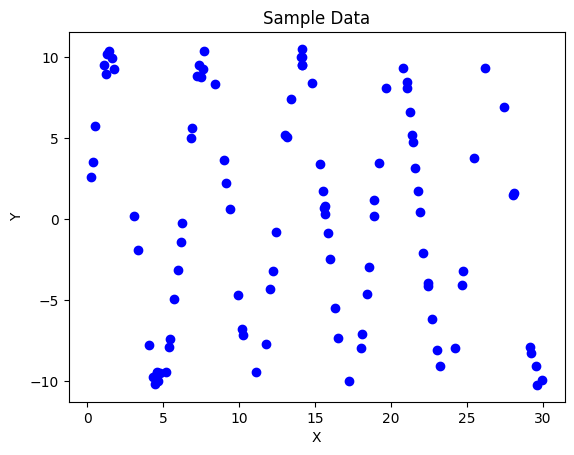

In [4]:
# 샘플 데이터 시각화

import matplotlib.pyplot as plt

plt.scatter(x_tensor.numpy(), y_tensor.numpy(), color='blue', label='Data Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Sample Data')
plt.show()

In [13]:
# 모델 학습 및 출력 확인

from torch.optim import Adam
from torch.nn import MSELoss

model = MSFRModel()
optimizer = Adam(model.parameters(), lr=1)
loss_fn = MSELoss()

epochs = 100
for epoch in range(1, epochs + 1):
    output = model(x_tensor)
    loss = loss_fn(output, y_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch}, Loss: {loss.item()}")

Shape of X: torch.Size([100, 1])
Shape of result: torch.Size([100, 1])
Epoch 1, Loss: 46.94611740112305
Shape of X: torch.Size([100, 1])
Shape of result: torch.Size([100, 1])
Epoch 2, Loss: 49.13090515136719
Shape of X: torch.Size([100, 1])
Shape of result: torch.Size([100, 1])
Epoch 3, Loss: 31.46941375732422
Shape of X: torch.Size([100, 1])
Shape of result: torch.Size([100, 1])
Epoch 4, Loss: 37.350887298583984
Shape of X: torch.Size([100, 1])
Shape of result: torch.Size([100, 1])
Epoch 5, Loss: 26.2817325592041
Shape of X: torch.Size([100, 1])
Shape of result: torch.Size([100, 1])
Epoch 6, Loss: 20.380977630615234
Shape of X: torch.Size([100, 1])
Shape of result: torch.Size([100, 1])
Epoch 7, Loss: 23.308212280273438
Shape of X: torch.Size([100, 1])
Shape of result: torch.Size([100, 1])
Epoch 8, Loss: 14.35368537902832
Shape of X: torch.Size([100, 1])
Shape of result: torch.Size([100, 1])
Epoch 9, Loss: 10.71350383758545
Shape of X: torch.Size([100, 1])
Shape of result: torch.Size([

In [14]:
# 모델 학습 결과 출력

from torch import no_grad

with no_grad():
    predicted = model(x_tensor)
    print("Predicted values:", predicted.squeeze().numpy())

Shape of X: torch.Size([100, 1])
Shape of result: torch.Size([100, 1])
Predicted values: [ 9.593877   -6.6051593   8.97818    -7.842949    0.38433924  4.099991
 -9.980824    3.5206919   7.440843   -9.937284    5.119649    9.882763
 -4.452339   -9.703098    0.39404798 -5.5092616  -2.835284   -7.4293585
  5.6062007  -8.385372   -9.274717    8.268436   -1.0062951  -7.942874
  9.278499   -6.64151     9.919713    6.4916186  -9.544238    9.948459
  1.2595621   9.765296    9.94132     2.6726835  -8.112749   -9.920679
  9.9315605  -9.107915   -0.9813688   5.5429053   4.120641   -6.57058
 -9.971653    7.349491    5.483309   -9.524553   -4.1015177  -9.58025
  1.6097845  -7.2514997  -2.1727567   1.833005    0.32326138 -4.097549
 -7.469648    9.242696    8.976974   -0.351875   -1.2632008  -8.2015505
 -7.470674    9.378176   -8.96128     9.814493    7.912978   -3.2809684
 -9.866606    2.7181141   9.947458    9.948519    0.7207806  -9.969871
  8.299471    3.5038116   2.1158814   0.44472656  7.649439

In [15]:
# 모델 파라미터 출력

bias = model.msfr.bias.detach().numpy()
cycle = model.msfr.cycle.detach().numpy()
weight = model.msfr.weight.detach().numpy()

print(f"Bias: {bias}")
print(f"Cycle: {cycle}")
print(f"Weight: {weight}")

Bias: [0.08200148]
Cycle: [12.556991]
Weight: [[-0.03175884  9.885073   -0.10577969  0.13084376 -0.06139799  0.02008595]]


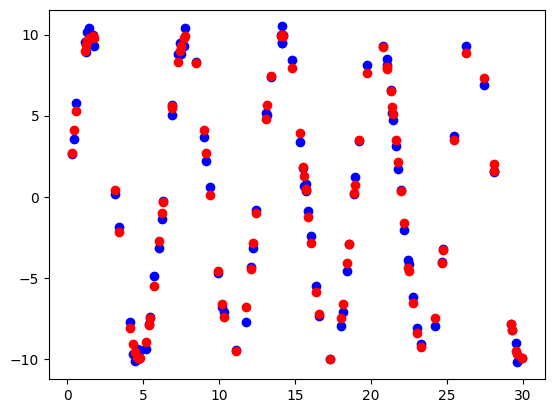

In [16]:
# 모델 학습 결과 시각화 및 비교

plt.scatter(x_tensor.numpy(), y_tensor.numpy(), color='blue', label='Data Points')
plt.scatter(x_tensor.numpy(), predicted.numpy(), color='red', label='MSFR Prediction')